In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy
import numpy as np

In [67]:
# calc_cooling coil paramteres:

Qcsf_0  = -2160935.2513834536
#Ta_re_cs = 15.0 
Ta_re_cs = 15.0 
Ta_sup_0 = 281.2
Qcsf = -135467.78079130786
#Ta_sup_cs = 15.0 
Ta_sup_cs = 15.0 
Tcs_sup_0 = 7L
ma_sup_0 = 392.3009555500433
Cpa = 1.008
Ta_re_0 = 281.2
ma_sup_cs = 12.02798323236849
Tcs_re_0 = 15L

In [68]:
# Initialize temperatures
tasup = Ta_sup_cs + 273
tare = Ta_re_cs + 273
tsc0 = Tcs_sup_0 + 273
trc0 = Tcs_re_0 + 273
mCw0 = Qcsf_0 / (tsc0 - trc0)

# log mean temperature at nominal conditions
TD10 = Ta_sup_0 - trc0
TD20 = Ta_re_0 - tsc0
LMRT0 = (TD20 - TD10) / scipy.log(TD20 / TD10)
UA0 = Qcsf_0 / LMRT0

AUa = UA0 * (ma_sup_cs / ma_sup_0) ** 0.77
NTUc = AUa / (ma_sup_cs * Cpa * 1000)
ec = 1 - scipy.exp(-NTUc)
tc = (tare - tasup + tasup * ec) / ec  # contact temperature of coil

k2 = -Qcsf / mCw0

In [69]:
def fh(x):
    TD1 = tc - (k2 + x)
    TD2 = tc - x
    LMRT = (TD2 - TD1) / scipy.log(TD2 / TD1)
    Eq = mCw0 * k2 - Qcsf_0 * (LMRT / LMRT0)
    return Eq

C:\Users\darthoma\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in cdouble_scalars


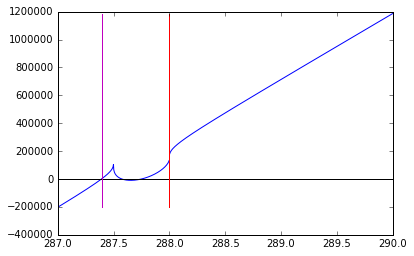

In [76]:
xmin = min(trc0 - 1, 288)
xmax = max(trc0 + 1, 290)

x = np.linspace(xmin, xmax, 1000)
y = np.vectorize(fh)(x)
plt.plot(x, y)
plt.plot((xmin, xmax), (0, 0), 'k-')
plt.plot((trc0, trc0), (min(y).real, max(y).real), 'r-')

bisect = scipy.optimize.bisect(fh, 0, 350, xtol=0.01, maxiter=500) 
plt.plot((bisect, bisect), (min(y).real, max(y).real), 'm-')
plt.show()

In [54]:
(trc0, trc0)
               

(288L, 288L)

In [58]:
(min(y).real, max(y).real)

(-139069.39941094397, 775103.32636274677)

In [73]:
import scipy.optimize
scipy.optimize.bisect(fh, 0, 350, xtol=0.01, maxiter=500)

C:\Users\darthoma\Anaconda2\lib\site-packages\scipy\optimize\zeros.py:248: ComplexWarning: Casting complex values to real discards the imaginary part
  r = _zeros._bisect(f,a,b,xtol,rtol,maxiter,args,full_output,disp)


287.3924255371094